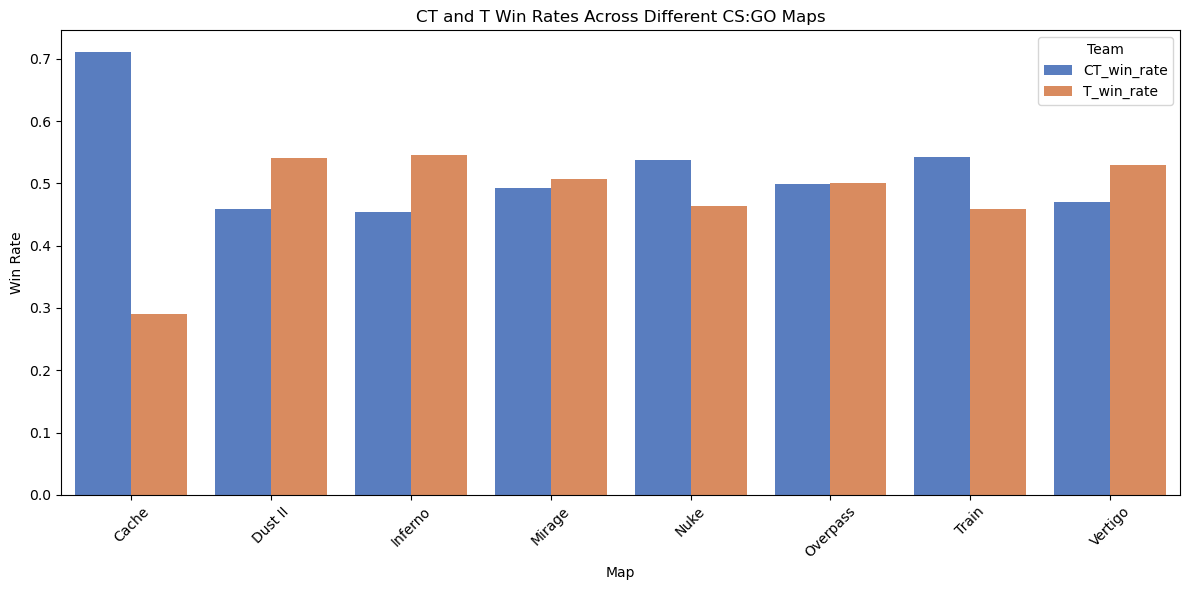

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'dataset.csv'
data = pd.read_csv(file_path)

map_name_mapping = {
    'de_cache': 'Cache',
    'de_dust2': 'Dust II',
    'de_inferno': 'Inferno',
    'de_mirage': 'Mirage',
    'de_nuke': 'Nuke',
    'de_overpass': 'Overpass',
    'de_train': 'Train',
    'de_vertigo': 'Vertigo'
}

data['map'] = data['map'].map(map_name_mapping)

map_winner_counts = data.groupby(['map', 'round_winner']).size().reset_index(name='counts')
pivot_table = map_winner_counts.pivot(index='map', columns='round_winner', values='counts')
pivot_table['total_rounds'] = pivot_table.sum(axis=1)
pivot_table['CT_win_rate'] = pivot_table['CT'] / pivot_table['total_rounds']
pivot_table['T_win_rate'] = pivot_table['T'] / pivot_table['total_rounds']

rates = pivot_table[['CT_win_rate', 'T_win_rate']].stack().reset_index()
rates.rename(columns={0: 'win_rate', 'round_winner': 'team'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='map', y='win_rate', hue='team', data=rates, palette='muted')
plt.title('CT and T Win Rates Across Different CS:GO Maps')
plt.ylabel('Win Rate')
plt.xlabel('Map')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.tight_layout()
plt.show()
